Se utilizará el experimento de Buffon para estimar pi.
El experimento consiste en tener tiradas random de agujas de longitud "L" en una superficie marcada con líneas paralelas de separación "D" y contar el # de agujas que cortan las líneas vs el total.

---------------

a) 

------------
Es un problema 2D y las pdf para las coordenadas X (centro de aguja) y Theta (ángulo polar) son:

PDF(x) = 1/(D/2) para x en (0, D/2) --> Probabilidad uniforme

PDF(Theta) = 1/(pi/2) para Theta en (0,pi/2) --> Probabilidad uniforme

---------------------
La probabilidad conjunta es: PDF(x, Theta) = 4/(D*pi)


b)

---------------

La CONDICIÓN para que la aguja corte la línea es x < (L/2)*sen(Thetha)

Entonces la probabilidad de que las agujas toquen las líneas es P = 2*L/(pi*D)

Ver: Wikipedia Buffon's needle problem para más detalle

In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
# Estilo de gráficos
plt.style.use('dark_background')

In [2]:
# Estilo de gráficos
plt.style.use('dark_background')

In [3]:
def Buffon(D, L, N):
    """ Devuelve una estimación de pi basada en el experimento de Buffon
    
    Parameters
    ----------
    D : .float
        Distancia entre líneas
    L : .float
        Longitud de la varilla. Sólo se acepta L<D en esta función
    N : int
        N° de tiradas
        
    Returns
    -------
    Est_pi : .float
        Estimación de pi
        
    """
     # Primero agrego la excepción:
    if L>D:
        raise ValueError('Error: L>D, se debe ingresar L<D')
        
    import numpy as np 
    
    x = (D/2.)*np.random.random(N) 
    Theta = (np.pi/2.)*np.random.random(N)
    # Computo las agujas que tocan una línea
    ij = 0
    Cont = np.empty(N) # Contador
    while ij<N:
        if (L/2)*np.sin(Theta[ij])>=x[ij]: # Condición 
            Cont[ij] = 1
        else: # Para que no haya errores de nan's
            Cont[ij] = 0
        ij = ij + 1
    Cruces = np.count_nonzero(Cont==1) # Cuento los cruces
    Porc = Cruces/N # Porcentaje de cruces vs N° total de agujas
    Est_pi = (2*L)/(Porc*D) # Estimación de pi

    return Est_pi

In [4]:
# Realizo el experimento
Paso = []
Est = []
for ij in range(100,10000,10):
    Paso.append(ij)
    Est.append( Buffon(D=10, L=5, N=ij) ) 

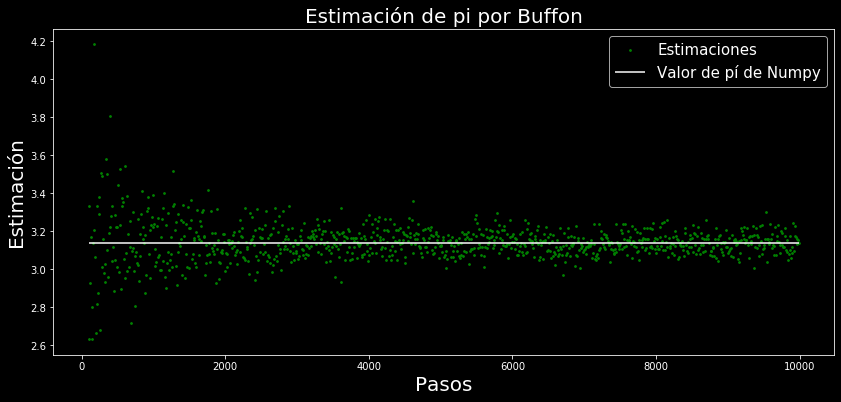

In [5]:
# Grafico
fig, ax = plt.subplots(1, 1, figsize = (14,6))

ax.scatter(Paso, Est, s=3, color='green', label='Estimaciones')
ax.hlines(y=np.pi, xmin=min(Paso), xmax=max(Paso), color='white', label='Valor de pí de Numpy')

ax.set_title('Estimación de pi por Buffon', fontsize=20)
ax.set_xlabel('Pasos', fontsize=20)
ax.set_ylabel('Estimación', fontsize=20)
ax.legend(fontsize=15);

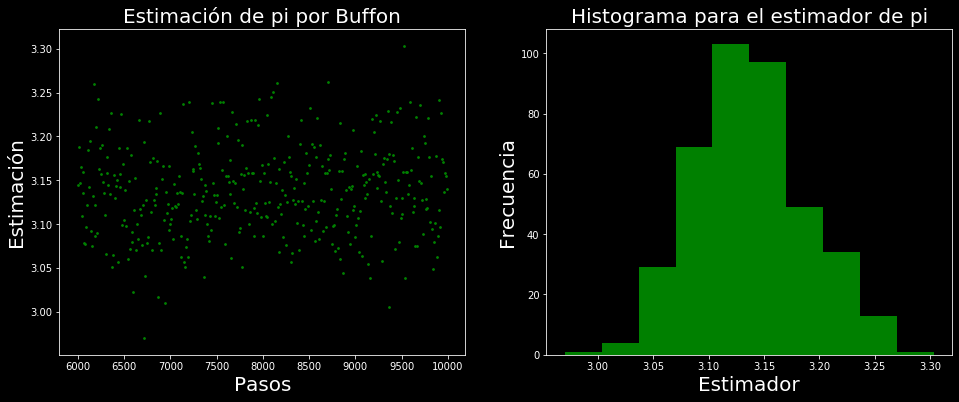

In [6]:
# Tomo por ejemplo los últimos 4000 pasos y hago el histograma
# (No me salió cómo automatizarlo)
fig, ax = plt.subplots(1, 2, figsize = (16,6))

ax[0].scatter(Paso[590:], Est[590:], s=3, color='green')
ax[1].hist(Est[590:], color='green')

ax[0].set_title('Estimación de pi por Buffon', fontsize=20)
ax[0].set_xlabel('Pasos', fontsize=20)
ax[0].set_ylabel('Estimación', fontsize=20);
ax[1].set_title('Histograma para el estimador de pi', fontsize=20)
ax[1].set_xlabel('Estimador', fontsize=20)
ax[1].set_ylabel('Frecuencia', fontsize=20);